In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import cv2

In [3]:
import matplotlib.pyplot as plt

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

이미지 파일 경로, 각 이미지 파일의 이름을 얻기 위한 작업

In [4]:
adenocarcinoma_test_file_path = '/content/drive/MyDrive/Data/test/adenocarcinoma'
adenocarcinoma_train_file_path = '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
adenocarcinoma_valid_file_path = '/content/drive/MyDrive/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'

largecell_test_file_path = '/content/drive/MyDrive/Data/test/large.cell.carcinoma'
largecell_train_file_path = '/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
largecell_valid_file_path = '/content/drive/MyDrive/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'

normal_test_file_path = '/content/drive/MyDrive/Data/test/normal'
normal_train_file_path = '/content/drive/MyDrive/Data/train/normal'
normal_valid_file_path = '/content/drive/MyDrive/Data/valid/normal'

squamous_test_file_path = '/content/drive/MyDrive/Data/test/squamous.cell.carcinoma'
squamous_train_file_path = '/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
squamous_valid_file_path = '/content/drive/MyDrive/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'

In [5]:
adenocarcinoma_test_image_list = os.listdir(adenocarcinoma_test_file_path)
adenocarcinoma_train_image_list = os.listdir(adenocarcinoma_train_file_path)
adenocarcinoma_valid_image_list = os.listdir(adenocarcinoma_valid_file_path)

largecell_test_image_list = os.listdir(largecell_test_file_path)
largecell_train_image_list = os.listdir(largecell_train_file_path)
largecell_valid_image_list = os.listdir(largecell_valid_file_path)

normal_test_image_list = os.listdir(normal_test_file_path)
normal_train_image_list = os.listdir(normal_train_file_path)
normal_valid_image_list = os.listdir(normal_valid_file_path)

squamous_test_image_list = os.listdir(squamous_test_file_path)
squamous_train_image_list = os.listdir(squamous_train_file_path)
squamous_valid_image_list = os.listdir(squamous_valid_file_path)

각 이미지 파일에 경로 추가 작업

In [6]:
adenocarcinoma_test_image_path_list = []
for i in adenocarcinoma_test_image_list:
  adenocarcinoma_test_image_path_list.append(adenocarcinoma_test_file_path + '/' + i)


두 작업의 함수화


In [7]:
def image_processing(file_path):
  image_name_list = os.listdir(file_path)
  image_path_list = []
  for i in image_name_list:
    image_path_list.append(file_path + '/' + i)
  
  image_list = []
  for j in image_path_list:
    image_list.append(cv2.imread(j, cv2.IMREAD_COLOR))
  
  return image_list

In [8]:
adenocarcinoma_test_image_list = image_processing('/content/drive/MyDrive/Data/test/adenocarcinoma')
adenocarcinoma_train_image_list = image_processing('/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')
adenocarcinoma_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')

largecell_test_image_list = image_processing('/content/drive/MyDrive/Data/test/large.cell.carcinoma')
largecell_train_image_list = image_processing('/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')
largecell_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')

normal_test_image_list = image_processing('/content/drive/MyDrive/Data/test/normal')
normal_train_image_list = image_processing('/content/drive/MyDrive/Data/train/normal')
normal_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/normal')

squamous_test_image_list = image_processing('/content/drive/MyDrive/Data/test/squamous.cell.carcinoma')
squamous_train_image_list = image_processing('/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')
squamous_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')

모든 이미지들을 담고 있는 리스트 생성

In [18]:
data = adenocarcinoma_test_image_list + adenocarcinoma_train_image_list + adenocarcinoma_valid_image_list + largecell_test_image_list + largecell_train_image_list + largecell_valid_image_list +  normal_test_image_list + normal_train_image_list + normal_valid_image_list + squamous_test_image_list + squamous_train_image_list + squamous_valid_image_list

In [19]:
len(data)

1000

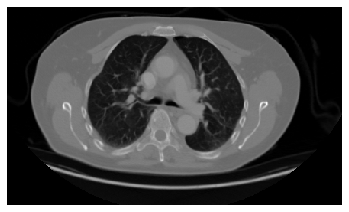

(260, 439, 3)


In [9]:
plot_image(adenocarcinoma_test_image_list[1])
plt.show()
print(adenocarcinoma_test_image_list[1].shape)

In [12]:
for i in adenocarcinoma_test_image_list:
  image_height = int(i.shape[0])
  image_width = int(i.shape[1])
  if height > image_height:
    height = image_height
  if width > image_width:
    width = image_width

print(height, width)

260 371


함수 생성

In [22]:
def biggest_image(image_list):
  height = int(image_list[0].shape[0])
  width = int(image_list[0].shape[1])

  for i in image_list:
    image_height = int(i.shape[0])
    image_width = int(i.shape[1])
    if height < image_height:
      height = image_height
    if width < image_width:
      width = image_width
    
    print(height, width)

  return height, width

In [23]:
def compare_hw(h,w,image):
  h_2, w_2 = biggest_image(image)

  if h_2 > h:
    h = h_2

  if w_2 > w:
    w = w_2

  return w, h


In [ ]:
height, width = biggest_image(data)
print(height, width)

이미지 변환

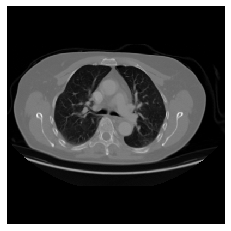

In [26]:
import tensorflow as tf
import torch

a = tf.image.resize_with_crop_or_pad(adenocarcinoma_test_image_list[1],400, 400)

plot_image(a)
plt.show()

In [27]:
image_data = []

for i in data:
  image_data.append(tf.image.resize_with_crop_or_pad(i,height, width))

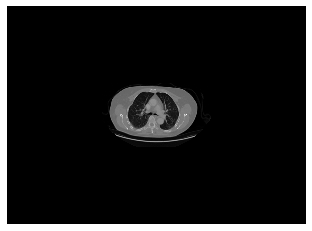

In [32]:
plot_image(image_data[1])
plt.show()